In [1]:
import os
import sv as SV
import numpy as np 
import astropy.table as atable
from tqdm.notebook import tqdm, trange

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('Agg')
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
all_exps = SV.info_exposures(release='everest')

In [4]:
in_bright = (all_exps['FAPRGRM'] == 'bgsmws') | (all_exps['FAPRGRM'] == 'bright')
print("%i exposures in BRIGHT" % np.sum(in_bright))

sv1_exps = all_exps[(all_exps['SURVEY'] == 'sv1') & in_bright]
sv3_exps = all_exps[(all_exps['SURVEY'] == 'sv3') & in_bright]
main_exps = all_exps[(all_exps['SURVEY'] == 'main') & in_bright]

print('%i SV1 BRIGHT exposure' % len(sv1_exps))
print('%i SV3 BRIGHT exposure' % len(sv3_exps))
print('%i MAIN BRIGHT exposure' % len(main_exps))

1418 exposures in BRIGHT
635 SV1 BRIGHT exposure
298 SV3 BRIGHT exposure
409 MAIN BRIGHT exposure


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$N_{\\rm exp}$')

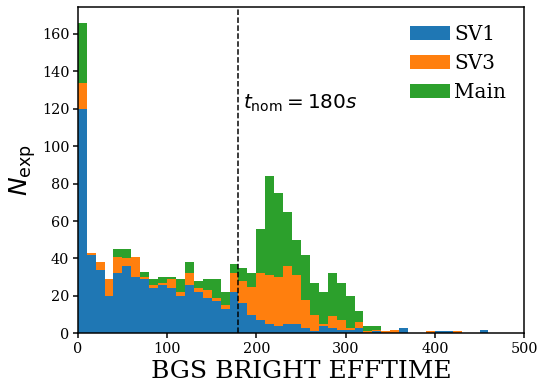

In [5]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist([sv1_exps['BGS_EFFTIME_BRIGHT'], sv3_exps['BGS_EFFTIME_BRIGHT'], main_exps['BGS_EFFTIME_BRIGHT']], range=(0., 500), bins=50, stacked=True, label=['SV1', 'SV3', 'Main'])

sub.axvline(180, color='k', linestyle='--')
sub.text(185, 120, r'$t_{\rm nom}= 180s$', fontsize=20)

sub.legend(loc='upper right', fontsize=20, handletextpad=0.2)
sub.set_xlabel(r'BGS BRIGHT EFFTIME', fontsize=25)
sub.set_xlim(0., 500)
sub.set_ylabel(r'$N_{\rm exp}$', fontsize=25)

In [6]:
def compile_rr(exps): 
    gals = [] 
    for i in trange(len(exps)): 
        try: 
            _gals = SV.get_exp_zsuccess(exps['TILEID'][i], exps['EXPID'][i], release='everest')
        except AssertionError: 
            continue 
        gals.append(_gals)
    return atable.vstack(gals)

In [7]:
near_nom = (sv1_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv1_exps['BGS_EFFTIME_BRIGHT'] < 200)
print('%i SV1 exposures near nominal' % np.sum(near_nom))
sv1_gals = compile_rr(sv1_exps[near_nom])

61 SV1 exposures near nominal


  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80629/20210103/redrock-3-80629-thru20210103.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80629/00070700/redrock-3-80629-exp00070700.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80641/20210107/redrock-3-80641-thru20210107.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80641/00070729/redrock-3-80641-exp00070729.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80641/20210107/redrock-3-80641-thru20210107.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80641/00070730/redrock-3-80641-exp00070730.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80642/20210107/redrock-3-80642-thru20210107.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80642/00070731/redrock-3-80642-exp00070731.fits does not ex

In [8]:
near_nom = (sv3_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv3_exps['BGS_EFFTIME_BRIGHT'] < 200)
print('%i SV3 exposures near nominal' % np.sum(near_nom))
sv3_gals = compile_rr(sv3_exps[near_nom])

39 SV3 exposures near nominal


  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/369/00085637/redrock-4-369-exp00085637.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/399/20210508/redrock-0-399-thru20210508.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/399/00087718/redrock-0-399-exp00087718.fits does not exist



In [9]:
near_nom = (main_exps['BGS_EFFTIME_BRIGHT'] > 160) & (main_exps['BGS_EFFTIME_BRIGHT'] < 200)
print('%i MAIN exposures near nominal' % np.sum(near_nom))
main_gals = compile_rr(main_exps[near_nom])

26 MAIN exposures near nominal


  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/20654/20210514/redrock-1-20654-thru20210514.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/20654/00088360/redrock-1-20654-exp00088360.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/20818/20210611/redrock-9-20818-thru20210611.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/20818/00093390/redrock-9-20818-exp00093390.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/21102/20210612/redrock-9-21102-thru20210612.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/21102/00093468/redrock-9-21102-exp00093468.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/20103/20210612/redrock-9-20103-thru20210612.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/20103/00093473/redrock-9-20103-exp00093473.fits does not ex

In [ ]:
# save compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'

sv1_gals.write(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.v1.fits'), overwrite=True)
sv3_gals.write(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.v1.fits'), overwrite=True)
main_gals.write(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v1.fits'), overwrite=True)